# 심부전증 분류분석
주제 : 심부전증 분류 예측
- 심혈관 질환(CVD)은 전 세계 사망 원인 1위이며 매년 약 1,790만 명이 사망 하며 이는 전 세계적으로 전체 사망의 31% 를 차지합니다 .
심부전은 CVD로 인해 발생하는 일반적인 사건이며 이 데이터 세트에는 심부전으로 인한 사망률을 예측하는 데 사용할 수 있는 12가지 기능이 포함되어 있습니다.

대부분의 심혈관 질환은 흡연, 건강에 해로운 식단 및 비만, 신체 활동 부족 및 유해한 알코올 사용과 같은 행동 위험 요인을 인구 전반에 걸친 전략을 사용하여 해결함으로써 예방할 수 있습니다.

심혈관 질환이 있거나 심혈관 위험이 높은 사람(고혈압, 당뇨병, 고지혈증 또는 이미 확립된 질병과 같은 하나 이상의 위험 요소의 존재로 인해) 은 기계 학습 모델이 큰 도움이 될 수 있는 조기 발견 및 관리 가 필요합니다.<br>
<br>

## 데이터 소개
- 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.

- 다음 1개의 csv 파일을 사용합니다.
heart_failure_clinical_records_dataset.csv

- 각 파일의 컬럼은 아래와 같습니다.
     - age: 환자의 나이
    - anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    - creatinine_phosphokinase: 크레아틴키나제 검사 결과<br>=>CK는 심장, 뇌, 골격근, 및 다른 조직에서 발견되는 효소입니다. 효소는 세포들이 정상적인 기능을 수행할 수 있도록 돕는 단백질입니다. 혈액 CK(크레아틴키나제) 농도는 근육 또는 심장 세포가 손상될 때에 올라갑니다. 
    - diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    - ejection_fraction: 박출계수 (%)
    - high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    - platelets: 혈소판 수 (kiloplatelets/mL)
    - serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    - serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    - sex: 성별 (0: 여성, 1: 남성)
    - smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    - time: 관찰 기간 (일)
    - DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)



데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Step 1. 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [3]:
f = '/content/mnt/MyDrive/데이터/판다스데이터분석_실습/집계EDA실습_및_분류분석/data'

In [4]:
df = pd.read_csv(f'{f}/heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석
- 데이터프레임의 각 컬럼 분석하기

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
# 데이터 각 컬럼(필드)의 타입 확인
# 13개의 수치형 컬럼으로 구성되어 있음. 별도의 형변환은 필요하지 않음.
# 1(빈혈), 3(당뇨), 5(혈압여부), 9(성별), 10(흡연여부), 12(사망여부)는 범주형 데이터 셋임.
# 12(사망여부)는 y레이블값으로 처리해야하며, 0과 1로 구성되어 있어서 별도의 변환은 필요없음.

# 그 외 1, 3, 5, 9, 10번 필드는 더미변수로도 변환하여 작업할 수 있음.(필수는 아니지만 일반적으로 변환함.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
# 기술통계를 통해서 데이터의 분포도 확인
# age의 표준편차가 큰 편임. => 중앙값과 max의 차이가 크기 때문에 표준편차에 영향을 주는 큰 값이 자료에 있고 이것을 제거해야할지 고민해야 함
# anaemia, diabetes, high_blood_pressure의 평균을 봤을 때 정상인 사람이 더 많음
# creatinine_phosphokinase의 단위가 크기 때문에 전체 자료에 대해서 표준화가 필요함.
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [36]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


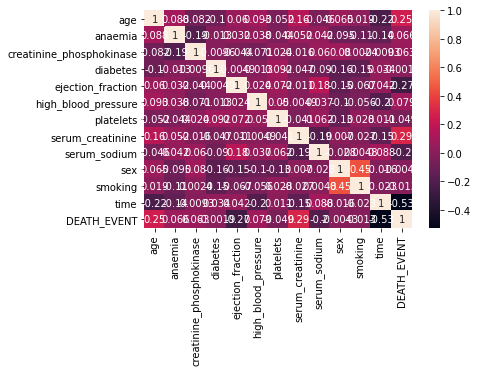

In [38]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
## 미션에 없음
# 예를 들어 고객의 나이가 대부분 90이하라면 이 데이터 셋은 제거하고 작업해도 됨.
df[df.age>90]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [13]:
# [미션]
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

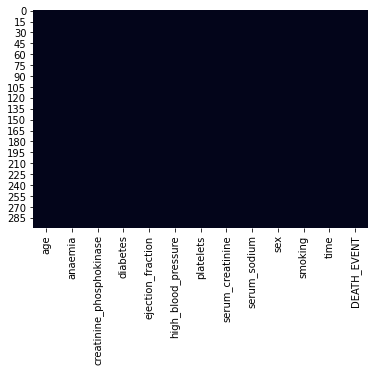

In [30]:
# [미션] 시각화
# 구글검색 '파이썬 na값 시각화'
sns.heatmap(df.isna(), cbar=False)
plt.show()

-  수치형 데이터의 히스토그램 그리기

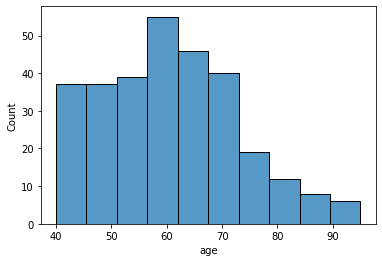

In [15]:
# df.describe()에서 age에 대한 해석에 도움이 됨.
sns.histplot(x='age', data=df)
plt.show()

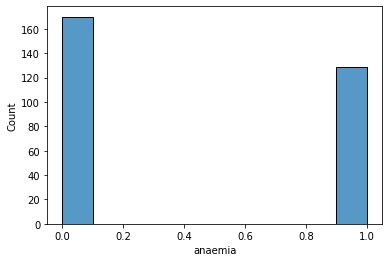

In [19]:
sns.histplot(x='anaemia', data=df)
plt.show()

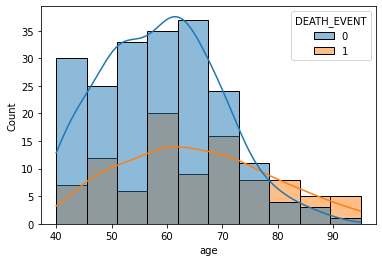

In [21]:
# [미션]
# 이 자료에 대하여 해석해야 함. 해석할 때 도움되는 자료는 groupby명령어로 수치값으로 표현해서 작업해보면 더 이해가 빠름
sns.histplot(x='age', hue='DEATH_EVENT', data=df, kde=True) # kde=True
plt.show()

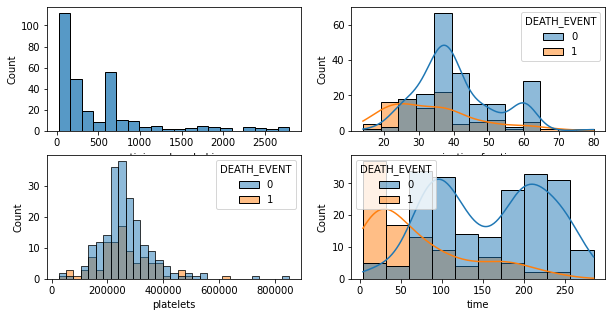

In [10]:
_, ax = plt.subplots(2, 2, figsize=(10,5))

sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'], ax=ax[0][0])

sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True, ax=ax[0][1])

sns.histplot(x='platelets', data=df, hue='DEATH_EVENT', ax=ax[1][0])

sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True, ax=ax[1][1])
plt.show()

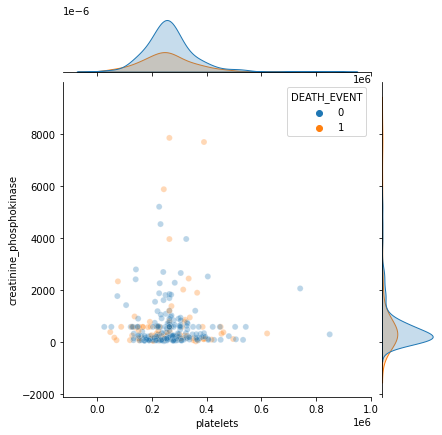

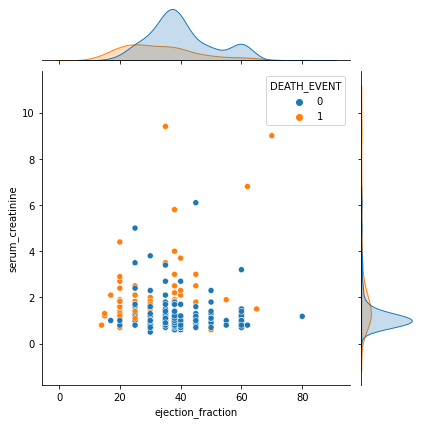

In [14]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')
plt.show()

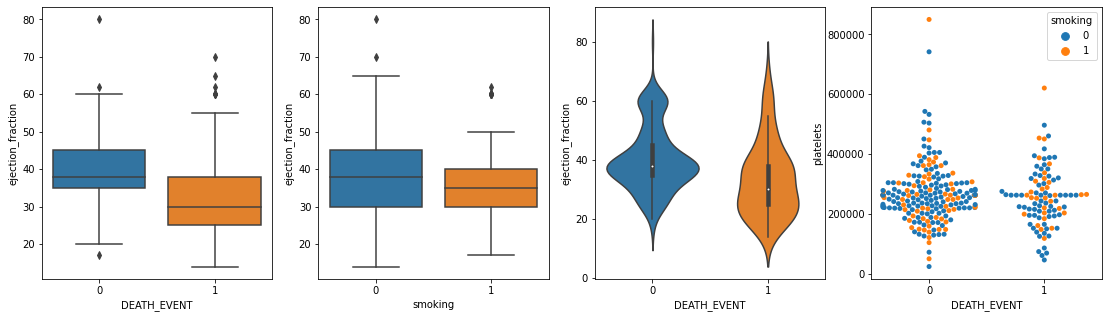

In [31]:
_, ax = plt.subplots(1, 4, figsize=(19, 5))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df, ax=ax[0])
sns.boxplot(x='smoking', y='ejection_fraction', data=df, ax=ax[1])
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df, ax=ax[2])
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df, ax=ax[3])
plt.show()

## Step 3. 모델 학습을 위한 데이터 전처리
- StandardScaler를 이용하여 데이터 전처리하기

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# 값의 범위가 평균0, 분산 1이 될 수 있도록 값을 일정한 범위로 조정
# x값의 값이 크면 y값에 영향을 많이 줌으로 그러한 일이 없게 값의 단위를 같게 조정함.

# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
# 1(빈혈), 3(당뇨), 5(혈압여부), 9(성별), 10(흡연여부), 12(사망여부)는 범주형 데이터 셋임.
# 12(사망여부)는 y레이블값으로 처리해야하며, 0과 1로 구성되어 있어서 별도의 변환은 필요없음.

X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']] # 범주형 데이터 셋
y = df['DEATH_EVENT'] # y레이블

In [24]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scale = scaler.transform(X_num)

# 스케일링된 데이터셋을 데이터 프레임으로 만들고 범주형 자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_scale1 = pd.DataFrame(data=X_scale, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scale1, X_cat], axis=1)
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


- 학습데이터와 테스트데이터 분리하기

In [32]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기
- Logistic Regression 모델 생성/학습하기

In [34]:
y.unique() # np.unique(y)

array([1, 0])

In [39]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression 모델 생성/학습
# y결과값이 0과 1의 두가지 값을 갖는 이항분류

model_lr = LogisticRegression() # 옵션없음
# model_lr = LogisticRegression(max_iter=5) # max_iter : 오차를 최소화하기 위한 반복횟수.
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# 1(사망)값이 예측이 잘 안되었음. 그래서 1값 중 예측이 안 맞는 것만 꺼내서 확인해 보려함.
pred = model_lr.predict(X_test)

cnt=0; tmpList=[]
for i,j in zip(y_test,pred):
    if i==j:
        tmpList.append({'y':i, 'pred':j, 're':'O'})
    else:
        tmpList.append({'y':i, 'pred':j, 're':'X'})
        cnt+=1
        
print(cnt)
tmp = pd.DataFrame(tmpList)
indexList = tmp[(tmp['y']==1)&(tmp['re']=='X')] # 인덱스에 해당하는 자료값들이 예측값이 맞지 않음

22


- 모델 학습 결과 평가하기

In [42]:
from sklearn.metrics import classification_report

# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred)) # 정확도 0.76, 0(생존)에 대한 재현율(0.92)은 괜찮으나 1(사망)에 대한 재현율은 좋지 않음.

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



- XGBoost 모델 생성/학습하기

In [ ]:
!pip install xgboost # 로컬인 경우 설치하여 사용

In [61]:
from xgboost import XGBClassifier

# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
# 모델 학습 결과 평가하기
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.68      0.58      0.62        26

    accuracy                           0.80        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.79      0.80      0.79        90



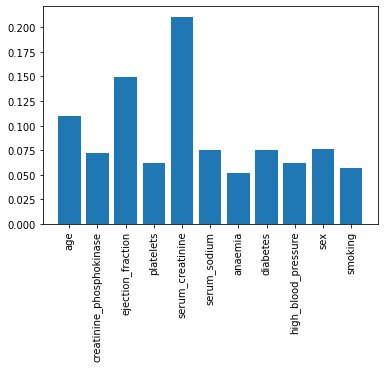

In [63]:
# 특징의 중요도 확인하기
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Step5 모델 학습 결과 심화 분석하기
- Precision-Recall 커브 확인하기
    - Precision(정밀도) : 모델이 True라고 예측했을 때, 실제값이 True인 비율
    - Recall(재현율) : 실제값이 True일 때, 그 값들을 모델이 True라고 예측한 비율
    - 재현율과 정밀도 사이는 Trade-off라는 관계가 존재
    - 이진분류인 상황에서 Positive(1) label로 분류하는 확률값의 디폴트값은 0.5이다. 이 디폴트값을 낮추고 높여줌으로써 정밀도와 재현율을 조절할 수가 있다. 이 디폴트값을 '분류 결정 임계값(threshold)' 라고 부른다. 

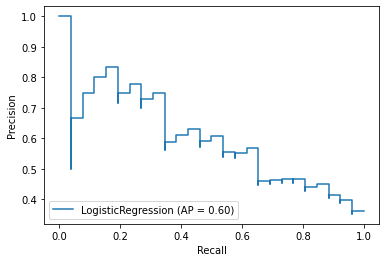

In [48]:
from sklearn.metrics import plot_precision_recall_curve

# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax = fig.gca()

plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax) # 정밀도(Precision) = TP/(TP+FP), 재현율(Recall) = TP/(TP+FN)
#plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

# 그림에서 보면 threshold값을 0.5에서 다른 수치로 조정하면 정밀도를 크게 감소시키지 않으면서 재현율을 높힐수 있을거 같음
#  => GridSearchCV를 이용해서 최적의 threshold값을 찾을 수 있음.

- ROC 커브 확인하기

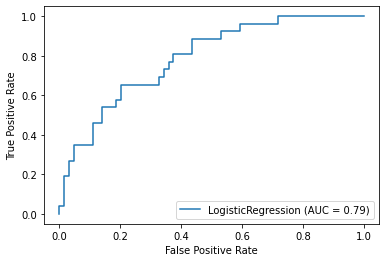

In [51]:
from sklearn.metrics import plot_roc_curve

# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
#plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

- 혼동행렬

[[59  5]
 [17  9]]


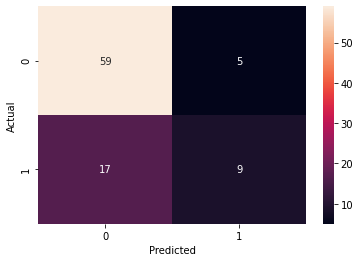

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()